In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
census=pd.read_csv('census.csv')

In [3]:
census.head(100)

,Country.Name,Region,Subregion,Year,Median.age..both.sexes,Median.age..females,Median.age..males,Total.Fertility.Rate,Infant.Mortality.Rate..Both.Sexes,Infant.Mortality.Rate..Males,Infant.Mortality.Rate..Females
0,Afghanistan,Asia,South-Central Asia,2003,16.2,16.2,16.2,6.58,141.3,150.0,132.2
1,Albania,Europe,Southern Europe,2003,27.1,27.7,26.3,2.07,17.1,18.4,15.8
2,Algeria,Africa,Northern Africa,2003,23.2,23.4,23.0,2.38,35.5,38.3,32.6
3,American Samoa,Oceania,Polynesia,2003,21.5,21.8,21.3,3.93,12.7,15.8,9.4
4,Andorra,Europe,Southern Europe,2003,37.7,37.4,38.0,1.29,3.6,3.8,3.5
...,...,...,...,...,...,...,...,...,...,...,...
95,Iraq,Asia,Western Asia,2003,18.6,18.8,18.4,4.77,34.9,38.4,31.3
96,Ireland,Europe,Northern Europe,2003,33.0,33.7,32.3,1.97,5.3,6.2,4.5
97,Isle of Man,Europe,Northern Europe,2003,40.2,41.0,39.3,1.70,5.8,5.9,5.6
98,Israel,Asia,Western Asia,2003,28.0,28.9,27.3,2.96,4.7,5.0,4.3


In [4]:
census.rename(
    columns={"Country.Name": "Country", "Region": "Region", "Subregion": "Subregion",
             "Median.age..both.sexes":"MABS","Median.age..females":"MAF","Median.age..males":"MAM",
            "Total.Fertility.Rate":"TFR","Infant.Mortality.Rate..Both.Sexes":"IMRBS",
            "Infant.Mortality.Rate..Males":"IMRM","Infant.Mortality.Rate..Females":"IMRF"},
    inplace=True,
)

In [5]:
census.head()

,Country,Region,Subregion,Year,MABS,MAF,MAM,TFR,IMRBS,IMRM,IMRF
0,Afghanistan,Asia,South-Central Asia,2003,16.2,16.2,16.2,6.58,141.3,150.0,132.2
1,Albania,Europe,Southern Europe,2003,27.1,27.7,26.3,2.07,17.1,18.4,15.8
2,Algeria,Africa,Northern Africa,2003,23.2,23.4,23.0,2.38,35.5,38.3,32.6
3,American Samoa,Oceania,Polynesia,2003,21.5,21.8,21.3,3.93,12.7,15.8,9.4
4,Andorra,Europe,Southern Europe,2003,37.7,37.4,38.0,1.29,3.6,3.8,3.5


In [6]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    453 non-null    object
 1   Region     453 non-null    object
 2   Subregion  453 non-null    object
 3   Year       453 non-null    int64 
 4   MABS       453 non-null    object
 5   MAF        453 non-null    object
 6   MAM        453 non-null    object
 7   TFR        453 non-null    object
 8   IMRBS      453 non-null    object
 9   IMRM       453 non-null    object
 10  IMRF       453 non-null    object
dtypes: int64(1), object(10)
memory usage: 39.1+ KB


In [7]:
census['Country'].nunique()

227

In [ ]:
#data cleaning 

In [1]:
census.drop(census.index[(census['MABS']=="--")],axis=0,inplace=True)

NameError: name 'census' is not defined

In [9]:
#changing the object type variable into numeric
census['MABS'] = pd.to_numeric(census['MABS'])
census['MAF'] = pd.to_numeric(census['MAF'])
census['MAM'] = pd.to_numeric(census['MAM'])
census['TFR'] = pd.to_numeric(census['TFR'])
census['IMRBS'] = pd.to_numeric(census['IMRBS'])
census['IMRM'] = pd.to_numeric(census['IMRM'])
census['IMRF'] = pd.to_numeric(census['IMRF'])

In [10]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 452
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    446 non-null    object 
 1   Region     446 non-null    object 
 2   Subregion  446 non-null    object 
 3   Year       446 non-null    int64  
 4   MABS       446 non-null    float64
 5   MAF        446 non-null    float64
 6   MAM        446 non-null    float64
 7   TFR        446 non-null    float64
 8   IMRBS      446 non-null    float64
 9   IMRM       446 non-null    float64
 10  IMRF       446 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 41.8+ KB


In [11]:
#creating sub dataframe filtered using the year 2003
census_2003=pd.DataFrame(census.loc[census['Year']==2003]).copy()

In [12]:
census_2003.head()

,Country,Region,Subregion,Year,MABS,MAF,MAM,TFR,IMRBS,IMRM,IMRF
0,Afghanistan,Asia,South-Central Asia,2003,16.2,16.2,16.2,6.58,141.3,150.0,132.2
1,Albania,Europe,Southern Europe,2003,27.1,27.7,26.3,2.07,17.1,18.4,15.8
2,Algeria,Africa,Northern Africa,2003,23.2,23.4,23.0,2.38,35.5,38.3,32.6
3,American Samoa,Oceania,Polynesia,2003,21.5,21.8,21.3,3.93,12.7,15.8,9.4
4,Andorra,Europe,Southern Europe,2003,37.7,37.4,38.0,1.29,3.6,3.8,3.5


In [13]:
census_2003.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 226
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    221 non-null    object 
 1   Region     221 non-null    object 
 2   Subregion  221 non-null    object 
 3   Year       221 non-null    int64  
 4   MABS       221 non-null    float64
 5   MAF        221 non-null    float64
 6   MAM        221 non-null    float64
 7   TFR        221 non-null    float64
 8   IMRBS      221 non-null    float64
 9   IMRM       221 non-null    float64
 10  IMRF       221 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 20.7+ KB


In [14]:
#creating dataframe using the year 2023
census_2023=pd.DataFrame(census.loc[census['Year']==2023]).copy()

In [15]:
census_2023.head()

,Country,Region,Subregion,Year,MABS,MAF,MAM,TFR,IMRBS,IMRM,IMRF
227,Albania,Europe,Southern Europe,2023,35.8,37.2,34.3,1.55,10.5,11.6,9.5
228,Algeria,Africa,Northern Africa,2023,28.9,29.2,28.6,2.97,18.8,19.9,17.6
229,American Samoa,Oceania,Polynesia,2023,29.4,30.0,28.8,2.13,9.9,11.9,7.7
230,Andorra,Europe,Southern Europe,2023,48.1,48.1,48.1,1.46,3.4,3.5,3.3
231,Angola,Africa,Middle Africa,2023,16.2,16.7,15.7,5.76,57.2,62.4,51.9


In [16]:
census_2023['Country'].nunique()

225

In [17]:
census_2023['Subregion'].nunique()

21

In [18]:
census_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 227 to 452
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    225 non-null    object 
 1   Region     225 non-null    object 
 2   Subregion  225 non-null    object 
 3   Year       225 non-null    int64  
 4   MABS       225 non-null    float64
 5   MAF        225 non-null    float64
 6   MAM        225 non-null    float64
 7   TFR        225 non-null    float64
 8   IMRBS      225 non-null    float64
 9   IMRM       225 non-null    float64
 10  IMRF       225 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 21.1+ KB


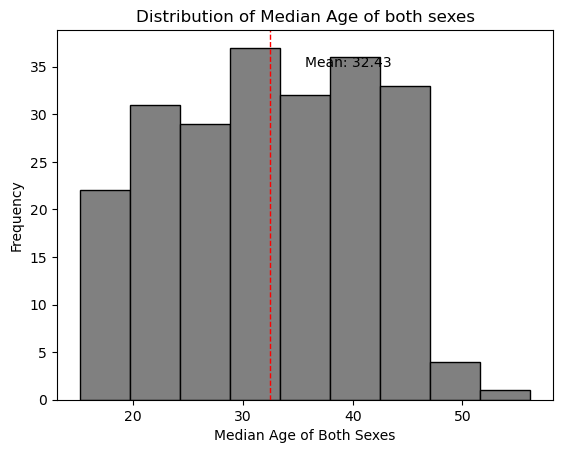

In [19]:
#Dirstribution of median age of both sexes
census_2023['MABS'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2023['MABS'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2023['MABS'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2023['MABS'].mean()))
plt.xlabel('Median Age of Both Sexes')
plt.ylabel('Frequency')
plt.title('Distribution of Median Age of both sexes')
plt.show()



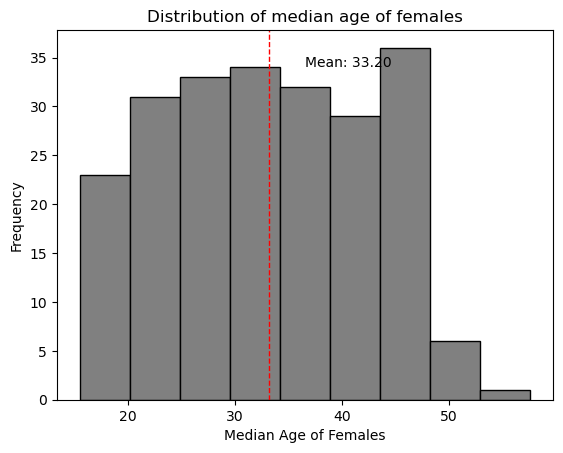

In [20]:
#Distribution of median age of females
census_2023['MAF'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2023['MAF'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2023['MAF'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2023['MAF'].mean()))
plt.xlabel('Median Age of Females')
plt.ylabel('Frequency')
plt.title('Distribution of median age of females')
plt.show()




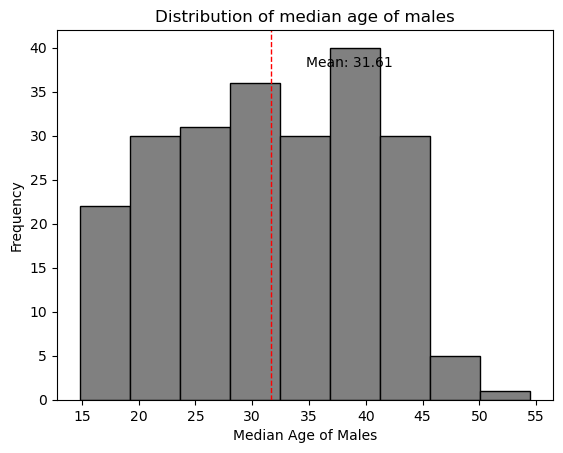

In [21]:
#Distribution of median age of males
census_2023['MAM'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2023['MAM'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2023['MAM'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2023['MAM'].mean()))
plt.xlabel('Median Age of Males')
plt.ylabel('Frequency')
plt.title('Distribution of median age of males')
plt.show()




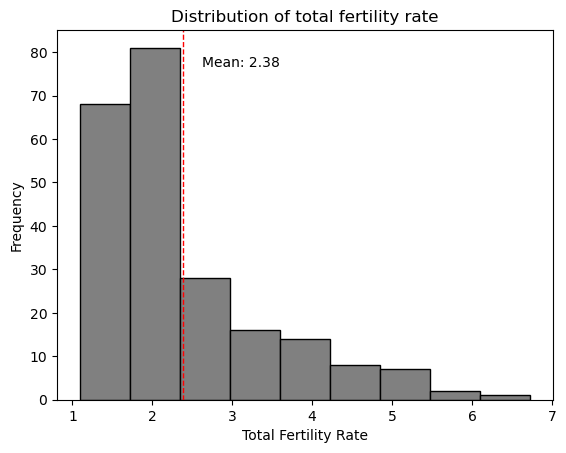

In [22]:
#Distribution of Total Fertility Rate
census_2023['TFR'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2023['TFR'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2023['TFR'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2023['TFR'].mean()))
plt.xlabel('Total Fertility Rate')
plt.ylabel('Frequency')
plt.title('Distribution of total fertility rate')
plt.show()



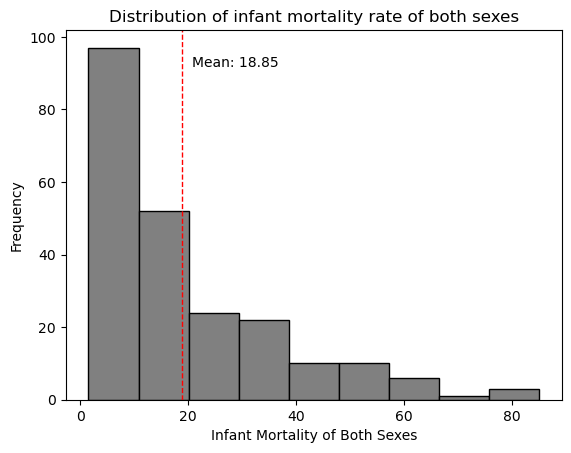

In [23]:
#Distribution of infant mortality rate of both sexes
census_2023['IMRBS'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2023['IMRBS'].mean(), color='red', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(census_2023['IMRBS'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2023['IMRBS'].mean()))
plt.xlabel('Infant Mortality of Both Sexes')
plt.ylabel('Frequency')
plt.title('Distribution of infant mortality rate of both sexes')
plt.show()



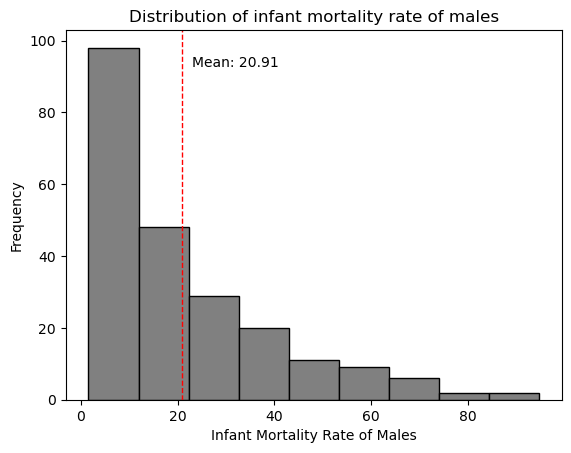

In [24]:
#Distribution of Infant mortality rate of males
census_2023['IMRM'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2023['IMRM'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2023['IMRM'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2023['IMRM'].mean()))
plt.xlabel('Infant Mortality Rate of Males')
plt.ylabel('Frequency')
plt.title('Distribution of infant mortality rate of males')
plt.show()


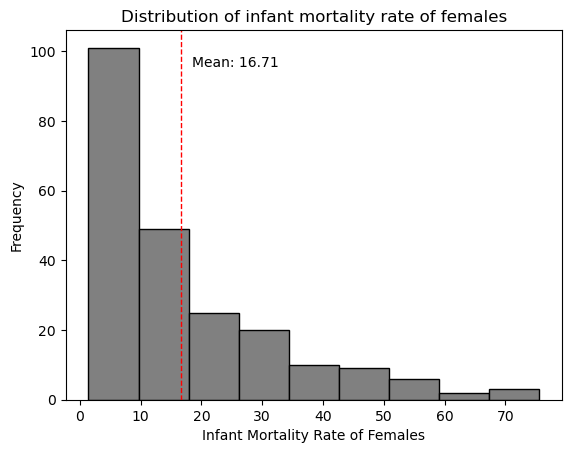

In [25]:

#Distribution of Infant Mortality rate of females

census_2023['IMRF'].hist(grid=False, bins=9,edgecolor='black',color="grey")
plt.axvline(census_2023['IMRF'].mean(), color='red', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(census_2023['IMRF'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(census_2023['IMRF'].mean()))
plt.xlabel('Infant Mortality Rate of Females')
plt.ylabel('Frequency')
plt.title('Distribution of infant mortality rate of females')
plt.show()

In [26]:
census_2023.groupby('Region')['MAF'].mean()


Region
Africa      22.616364
Americas    35.818367
Asia        32.182353
Europe      44.465306
Oceania     30.976190
Name: MAF, dtype: float64

In [27]:
census_2023.groupby('Region')['MAM'].mean()

Region
Africa      21.703636
Americas    34.071429
Asia        31.239216
Europe      41.485714
Oceania     29.709524
Name: MAM, dtype: float64

In [28]:
census_2023.groupby('Region')['IMRM'].mean()

Region
Africa      45.320000
Americas    13.697959
Asia        18.527451
Europe       5.253061
Oceania     16.085714
Name: IMRM, dtype: float64

In [29]:
census_2023.groupby('Region')['IMRF'].mean()

Region
Africa      36.681818
Americas    10.512245
Asia        14.945098
Europe       4.348980
Oceania     12.014286
Name: IMRF, dtype: float64

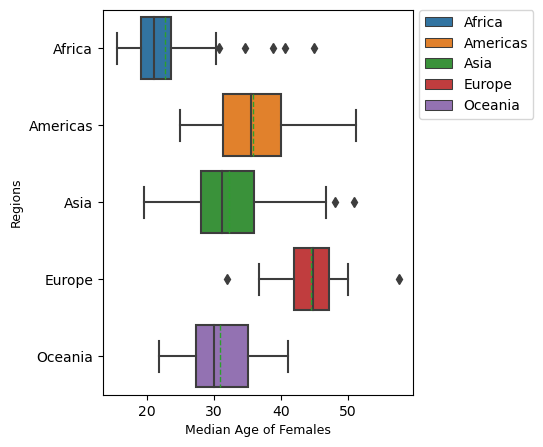

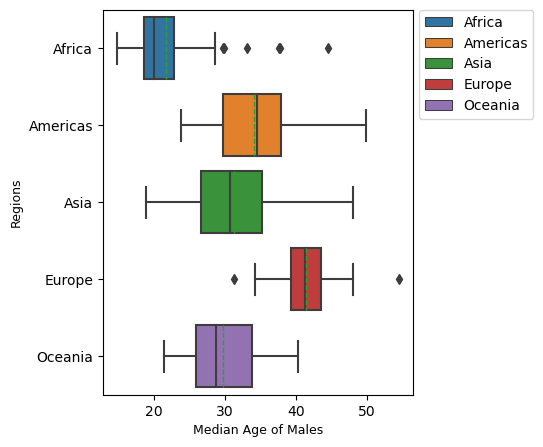

In [32]:

#boxplot showing differences of median age of females between regions
plt.figure(figsize=(4,5)) 
ax= sns.boxplot(x='MAF',y='Region' ,data=census_2023.sort_values(by="Region"),hue="Region",showmeans=True, meanline=True,dodge=False)
plt.xlabel("Median Age of Females", fontsize=9)
plt.ylabel("Regions", fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#boxplot showing differences of median age of males between regions 
plt.figure(figsize=(4,5)) 
ax = sns.boxplot(x='MAM', y='Region', data=census_2023.sort_values(by="Region"),hue="Region",showmeans=True, meanline=True,dodge=False)
plt.xlabel("Median Age of Males", fontsize=9)
plt.ylabel("Regions", fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

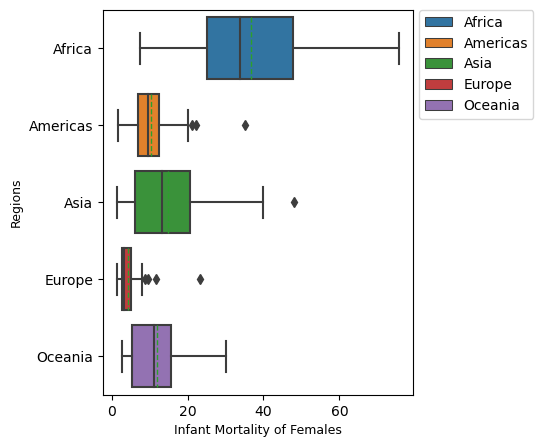

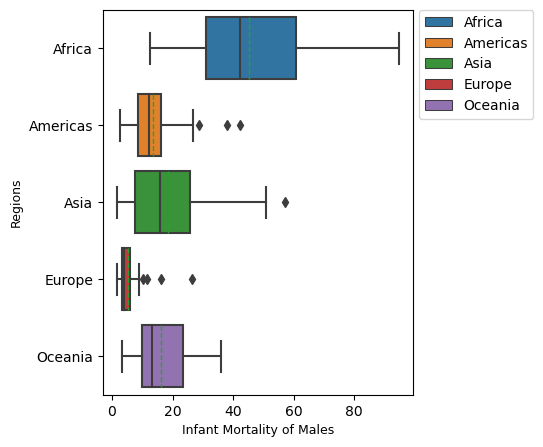

In [33]:
 #boxplot showing differences of Infant mortality rate of females between regions
plt.figure(figsize=(4,5)) 
ax= sns.boxplot(x='IMRF',y='Region' ,data=census_2023.sort_values(by="Region"),hue="Region",showmeans=True, meanline=True,dodge=False)
plt.xlabel("Infant Mortality of Females", fontsize=9)
plt.ylabel("Regions", fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#boxplot showing differences of infant mortality rate of males between regions 
plt.figure(figsize=(4,5)) 
ax = sns.boxplot(x='IMRM', y='Region', data=census_2023.sort_values(by="Region"),hue="Region",showmeans=True, meanline=True,dodge=False)
plt.xlabel("Infant Mortality of Males", fontsize=9)
plt.ylabel("Regions", fontsize=9)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

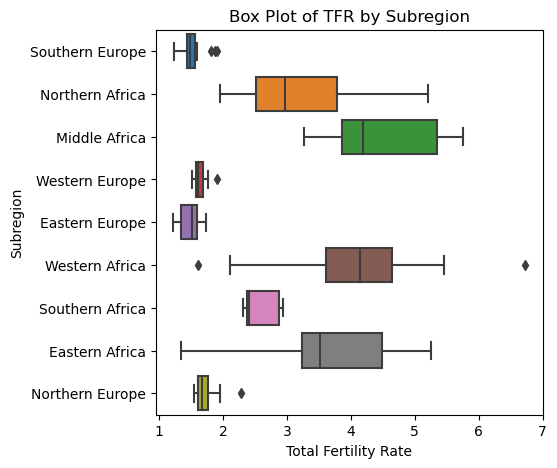

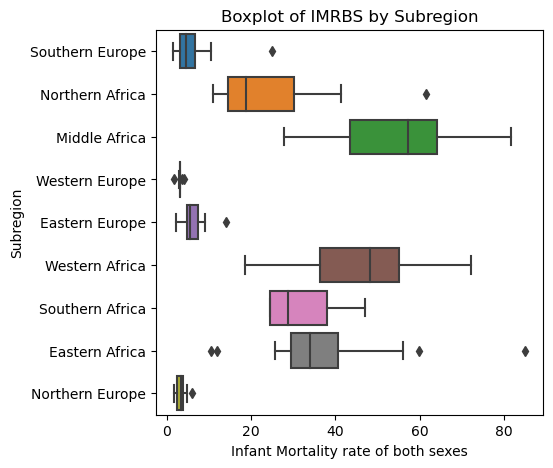

In [34]:
filtered_data = census_2023[census_2023['Region'].isin(['Europe','Africa'])]
plt.figure(figsize=(5, 5))


sns.boxplot(x='TFR',y='Subregion', data=filtered_data)
plt.title('Box Plot of TFR by Subregion')
plt.xlabel('Total Fertility Rate')
plt.ylabel('Subregion')
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(x='IMRBS',y='Subregion',data=filtered_data)
plt.title('Boxplot of IMRBS by Subregion')
plt.xlabel('Infant Mortality rate of both sexes')
plt.ylabel('Subregion')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


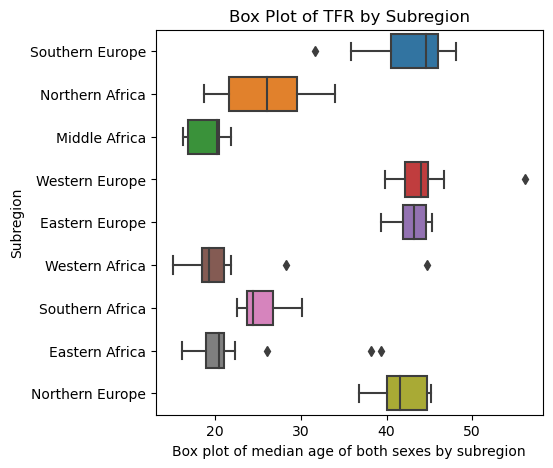

In [35]:

plt.figure(figsize=(5, 5))


sns.boxplot(x='MABS',y='Subregion', data=filtered_data)
plt.title('Box Plot of TFR by Subregion')
plt.xlabel('Box plot of median age of both sexes by subregion')
plt.ylabel('Subregion')
plt.show()


In [34]:
from scipy.stats import f_oneway
variables = [ 'IMRBS', 'TFR','MABS']

    

In [35]:


# Calculate IQR for TFR and IMR by subregion
subregions = filtered_data['Subregion'].unique()
for subregion in subregions:
    subregion_data = filtered_data[filtered_data['Subregion'] == subregion]
    
    iqr_tfr = np.percentile(subregion_data['TFR'], 75) - np.percentile(subregion_data['TFR'], 25)
    iqr_imrbs = np.percentile(subregion_data['IMRBS'], 75) - np.percentile(subregion_data['IMRBS'], 25)
    iqr_mabs = np.percentile(subregion_data['MABS'], 75) - np.percentile(subregion_data['MABS'], 25)
    #iqr_imr = np.percentile(subregion_data['IMRBS'], 75) - np.percentile(subregion_data['IMRBS'], 25)
    
    
    print(f'IQR for {subregion} - TFR: {iqr_tfr}, IMRBS: {iqr_imrbs}, MABS: {iqr_mabs}')

IQR for Southern Europe - TFR: 0.13250000000000006, IMRBS: 3.4250000000000003, MABS: 5.499999999999993
IQR for Northern Africa - TFR: 1.2750000000000004, IMRBS: 15.650000000000002, MABS: 7.949999999999996
IQR for Middle Africa - TFR: 1.4899999999999998, IMRBS: 20.5, MABS: 3.6999999999999993
IQR for Western Europe - TFR: 0.10999999999999988, IMRBS: 0.10000000000000009, MABS: 2.5999999999999943
IQR for Eastern Europe - TFR: 0.25250000000000017, IMRBS: 2.625, MABS: 2.7750000000000057
IQR for Western Africa - TFR: 1.0400000000000005, IMRBS: 18.800000000000004, MABS: 2.5
IQR for Southern Africa - TFR: 0.5099999999999998, IMRBS: 13.700000000000003, MABS: 3.1000000000000014
IQR for Eastern Africa - TFR: 1.2600000000000002, IMRBS: 11.200000000000003, MABS: 2.1000000000000014
IQR for Northern Europe - TFR: 0.1499999999999999, IMRBS: 1.3250000000000002, MABS: 4.774999999999999


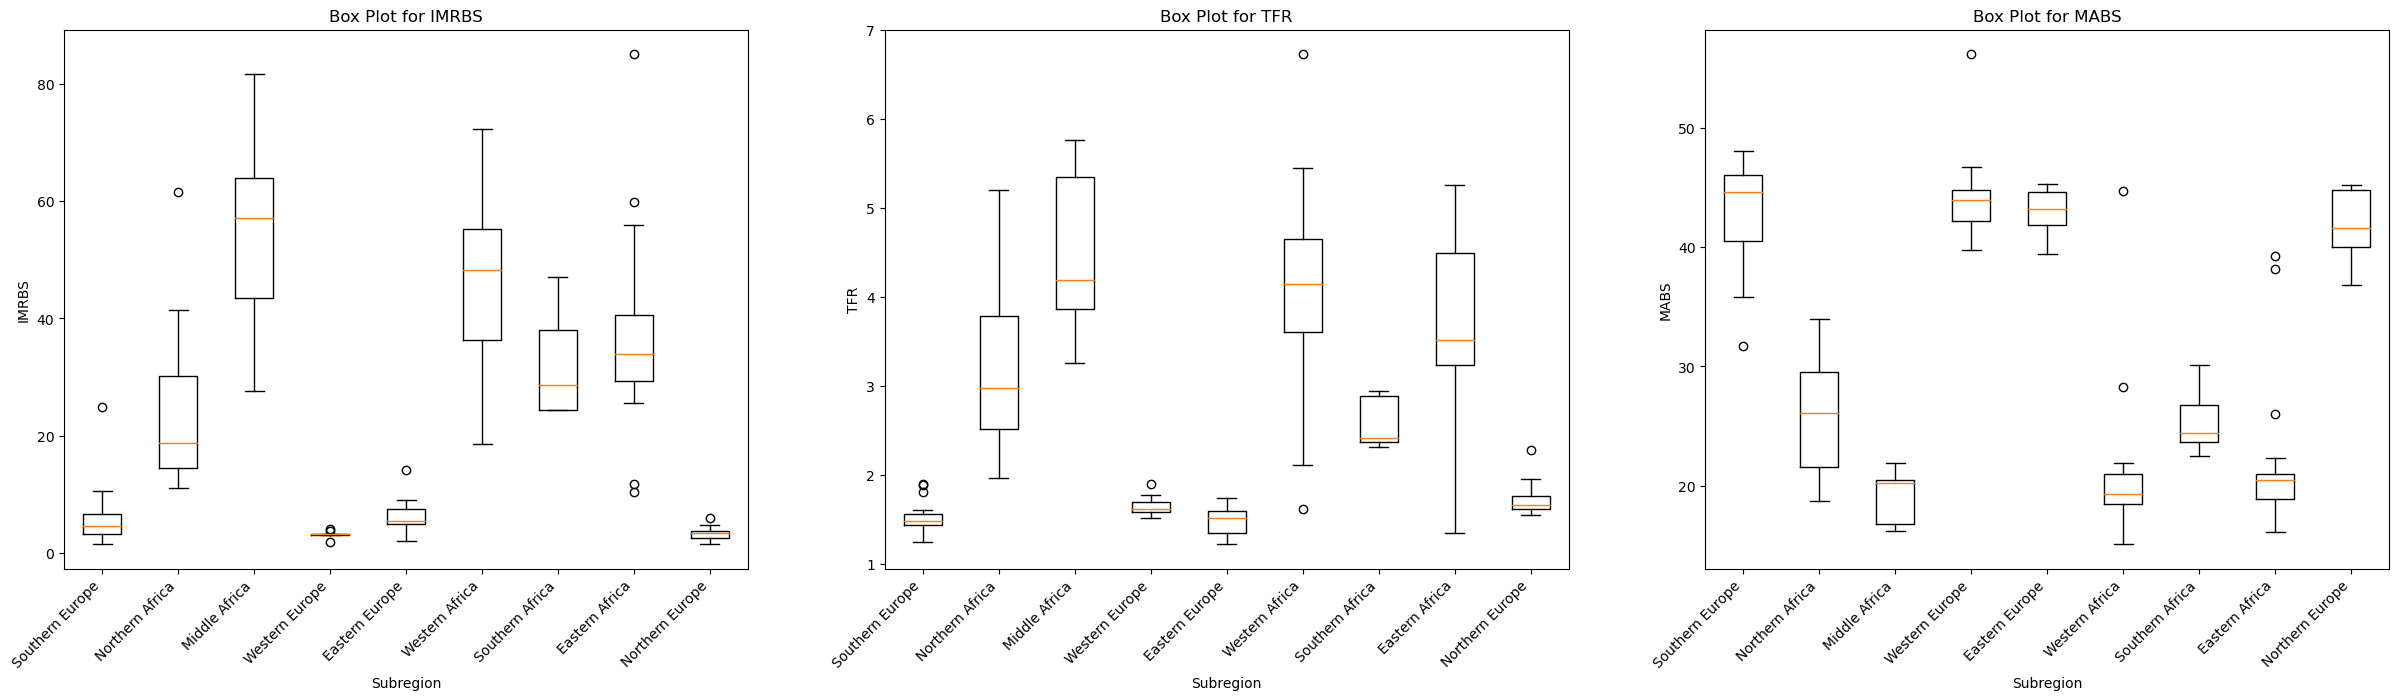

ANOVA results for 'IMRBS':
F-statistic: 31.96
P-value: 0.0000
There are significant differences in IMRBS between subregions.
ANOVA results for 'TFR':
F-statistic: 26.26
P-value: 0.0000
There are significant differences in TFR between subregions.
ANOVA results for 'MABS':
F-statistic: 58.12
P-value: 0.0000
There are significant differences in MABS between subregions.


In [36]:
fig, axs = plt.subplots(1, len(variables), figsize=(30, 7))
for i, variable in enumerate(variables):
    ax = axs[i]
    subregions = filtered_data['Subregion'].unique()

    # Create box plots for each subregion
    box_data = [filtered_data[filtered_data['Subregion'] == subregion][variable] for subregion in subregions]
    ax.boxplot(box_data, labels=subregions)
    ax.set_title(f'Box Plot for {variable}')
    ax.set_xlabel('Subregion')
    ax.set_ylabel(variable)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Step 2: Compare Measures of Central Tendency Between Different Subregions
for variable in variables:
    subregions = filtered_data['Subregion'].unique()
    data_groups = [filtered_data[filtered_data['Subregion'] == subregion][variable] for subregion in subregions]

    f_statistic, p_value = f_oneway(*data_groups)
    print(f"ANOVA results for '{variable}':")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f"There are significant differences in {variable} between subregions.")
    else:
        print(f"No significant differences in {variable} between subregions.")

In [37]:
for variable in variables:
    print(f"Variance in {variable} within subregions:")
    subregions = filtered_data['Subregion'].unique()
    
    variances = []
    
    for subregion in subregions:
        subregion_data = filtered_data[filtered_data['Subregion'] == subregion][variable]
        standard_deviation = np.std(subregion_data, ddof=1)  # Use ddof=1 for sample variance
        variances.append(standard_deviation)
        
        print(f"Subregion {subregion}: Variance = {standard_deviation:.2f}")

    overall_variance = np.std(filtered_data[variable], ddof=1)
    print(f"Overall Variance of {variable}: {overall_variance:.2f}")
    
    # Check for homogeneity by comparing variances
    if all(abs( standard_deviation- overall_variance) <= 0.01 for variance in variances):
        print(f"The variances are similar within and between subregions for {variable}.")
    else:
        print(f"The variances are not similar within and between subregions for {variable}.")
    print()

Variance in IMRBS within subregions:
Subregion Southern Europe: Variance = 5.57
Subregion Northern Africa: Variance = 18.79
Subregion Middle Africa: Variance = 18.81
Subregion Western Europe: Variance = 0.60
Subregion Eastern Europe: Variance = 3.45
Subregion Western Africa: Variance = 14.57
Subregion Southern Africa: Variance = 9.84
Subregion Eastern Africa: Variance = 17.68
Subregion Northern Europe: Variance = 1.18
Overall Variance of IMRBS: 22.66
The variances are not similar within and between subregions for IMRBS.

Variance in TFR within subregions:
Subregion Southern Europe: Variance = 0.19
Subregion Northern Africa: Variance = 1.19
Subregion Middle Africa: Variance = 0.92
Subregion Western Europe: Variance = 0.12
Subregion Eastern Europe: Variance = 0.17
Subregion Western Africa: Variance = 1.20
Subregion Southern Africa: Variance = 0.30
Subregion Eastern Africa: Variance = 1.16
Subregion Northern Europe: Variance = 0.20
Overall Variance of TFR: 1.39
The variances are not simil

In [38]:
for variable in variables:
    print(f"Mean in {variable} within subregions:")
    subregions = filtered_data['Subregion'].unique()
    
    means = []
    
    for subregion in subregions:
        subregion_data = filtered_data[filtered_data['Subregion'] == subregion][variable]
        mean = np.mean(subregion_data)
        means.append(mean)
        
        print(f"Subregion {subregion}: Mean = {mean:.2f}")

    overall_mean = np.mean(filtered_data[variable])
    print(f"Overall Mean of {variable}: {overall_mean:.2f}")
    
    # Check for homogeneity by comparing means
    if all(abs(mean - overall_mean) <= 0.01 for mean in means):
        print(f"The means are similar within and between subregions for {variable}.")
    else:
        print(f"The means are not similar within and between subregions for {variable}.")
    print()

Mean in IMRBS within subregions:
Subregion Southern Europe: Mean = 6.09
Subregion Northern Africa: Mean = 25.77
Subregion Middle Africa: Mean = 54.43
Subregion Western Europe: Mean = 3.14
Subregion Eastern Europe: Mean = 6.31
Subregion Western Africa: Mean = 46.59
Subregion Southern Africa: Mean = 32.52
Subregion Eastern Africa: Mean = 37.29
Subregion Northern Europe: Mean = 3.34
Overall Mean of IMRBS: 23.99
The means are not similar within and between subregions for IMRBS.

Mean in TFR within subregions:
Subregion Southern Europe: Mean = 1.53
Subregion Northern Africa: Mean = 3.25
Subregion Middle Africa: Mean = 4.43
Subregion Western Europe: Mean = 1.65
Subregion Eastern Europe: Mean = 1.48
Subregion Western Africa: Mean = 4.10
Subregion Southern Africa: Mean = 2.58
Subregion Eastern Africa: Mean = 3.60
Subregion Northern Europe: Mean = 1.73
Overall Mean of TFR: 2.74
The means are not similar within and between subregions for TFR.

Mean in MABS within subregions:
Subregion Southern E

/Users/sagarbasnet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


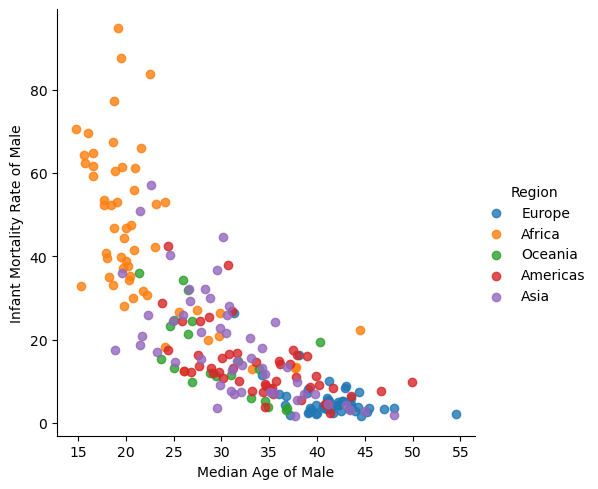

In [58]:

sns.lmplot(x='MAM',y='IMRM',data=census_2023,hue="Region", fit_reg=False)
plt.xlabel('Median Age of Male')
plt.ylabel('Infant Mortality Rate of Male')

plt.show()

/Users/sagarbasnet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


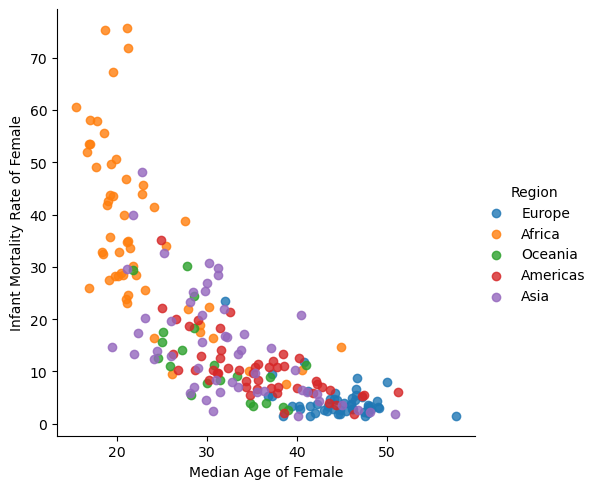

In [59]:
sns.lmplot(x='MAF',y='IMRF',data=census_2023,hue="Region", fit_reg=False)
plt.xlabel('Median Age of Female')
plt.ylabel('Infant Mortality Rate of Female')

plt.show()

In [40]:
census_2023[['MABS','MAM','MAF','IMRBS','IMRF','IMRM']].corr()

,MABS,MAM,MAF,IMRBS,IMRF,IMRM
MABS,1.000000,0.996665,0.994889,-0.796418,-0.792758,-0.796625
MAM,0.996665,1.000000,0.984064,-0.799534,-0.795834,-0.799772
MAF,0.994889,0.984064,1.000000,-0.784842,-0.781374,-0.784927
IMRBS,-0.796418,-0.799534,-0.784842,1.000000,0.997553,0.998480
IMRF,-0.792758,-0.795834,-0.781374,0.997553,1.000000,0.992194
IMRM,-0.796625,-0.799772,-0.784927,0.998480,0.992194,1.000000


/Users/sagarbasnet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



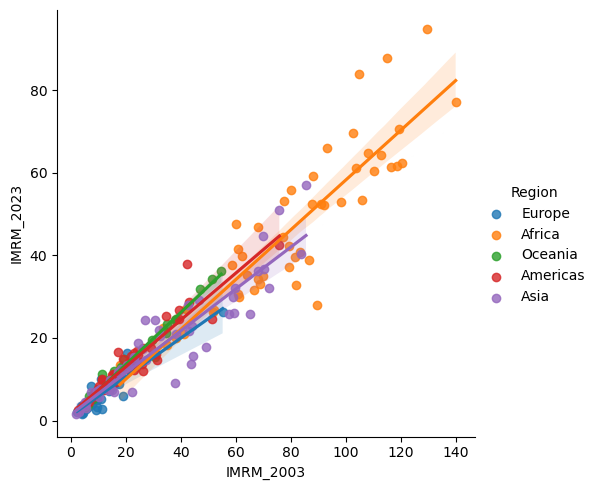

In [138]:
# Merge the two DataFrames on common columns (e.g., 'Country', 'Region', 'Subregion')
df_merged = pd.merge(census_2003, census_2023, on=['Country', 'Region', 'Subregion'], suffixes=('_2003', '_2023'))
hue_column = 'Region'
sns.lmplot(x='IMRM_2003', y='IMRM_2023',hue='Region',data=df_merged)
#sns.lmplot(x='IMRM_2003', y='IMRM_2023',hue='Region',data=df_merged ).set(title='IMR of male 2003 vs 2023')


/Users/sagarbasnet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='IMRM_2003', ylabel='IMRM_2023'>

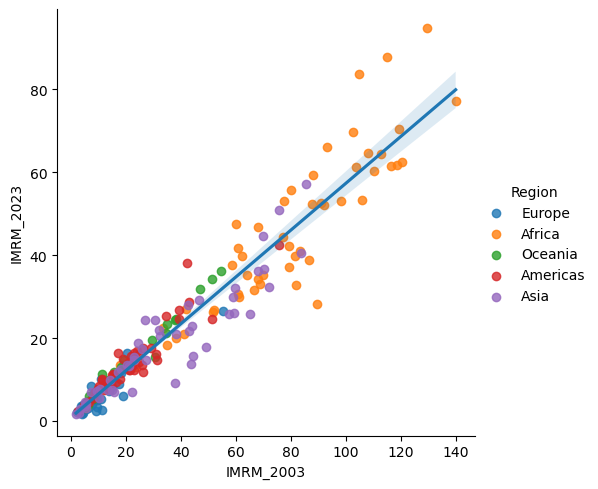

In [144]:
g = sns.lmplot(x="IMRM_2003", y="IMRM_2023", hue="Region", data=df_merged, fit_reg=False)
sns.regplot(x="IMRM_2003", y="IMRM_2023", data=df_merged, scatter=False, ax=g.axes[0, 0])

/Users/sagarbasnet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='IMRF_2003', ylabel='IMRF_2023'>

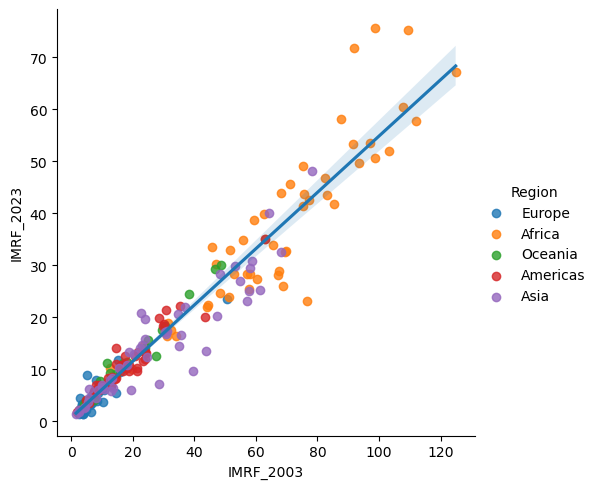

In [145]:
g = sns.lmplot(x="IMRF_2003", y="IMRF_2023", hue="Region", data=df_merged, fit_reg=False)
sns.regplot(x="IMRF_2003", y="IMRF_2023", data=df_merged, scatter=False, ax=g.axes[0, 0])

/Users/sagarbasnet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='TFR_2003', ylabel='TFR_2023'>

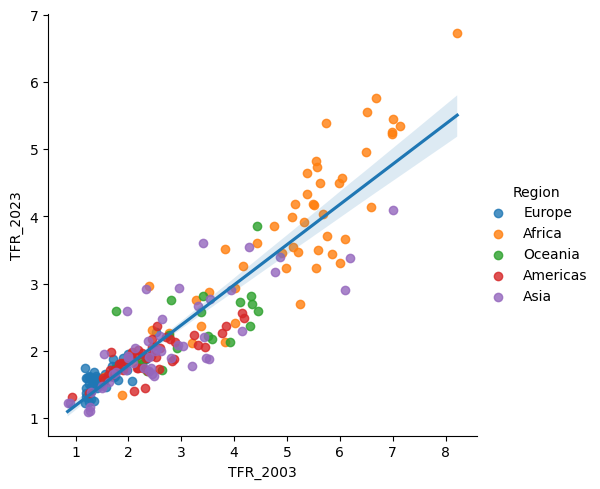

In [146]:
g = sns.lmplot(x="TFR_2003", y="TFR_2023", hue="Region", data=df_merged, fit_reg=False)
sns.regplot(x="TFR_2003", y="TFR_2023", data=df_merged, scatter=False, ax=g.axes[0, 0])




/Users/sagarbasnet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='MAM_2003', ylabel='MAM_2023'>

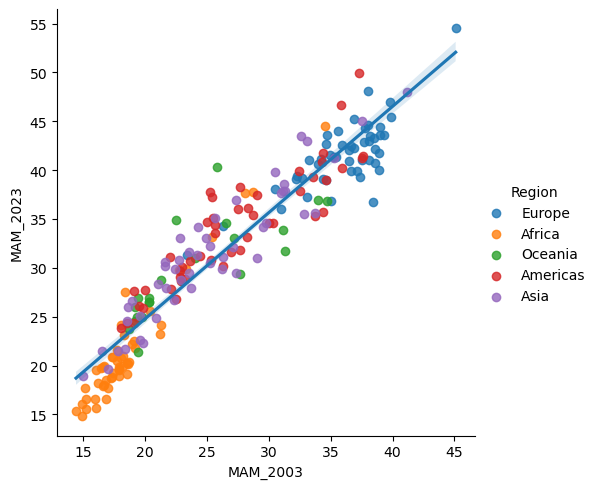

In [147]:
g = sns.lmplot(x="MAM_2003", y="MAM_2023", hue="Region", data=df_merged, fit_reg=False)
sns.regplot(x="MAM_2003", y="MAM_2023", data=df_merged, scatter=False, ax=g.axes[0, 0])

/Users/sagarbasnet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='MAF_2003', ylabel='MAF_2023'>

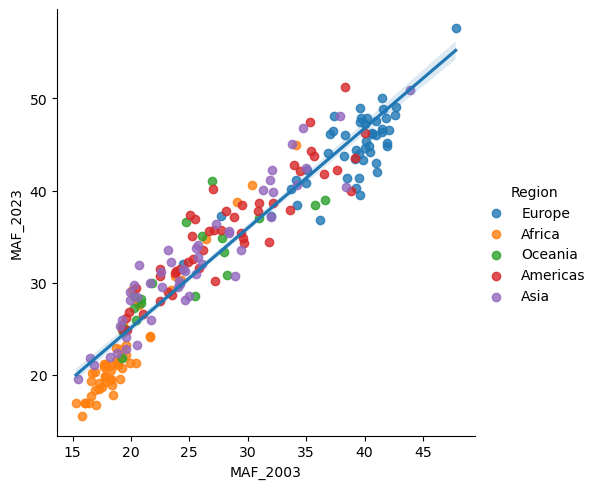

In [148]:
g = sns.lmplot(x="MAF_2003", y="MAF_2023", hue="Region", data=df_merged, fit_reg=False)
sns.regplot(x="MAF_2003", y="MAF_2023", data=df_merged, scatter=False, ax=g.axes[0, 0])